# MA5634/5663 - Fundamentals of Machine Learning

## Assignment 2022/23 (First Sitting)

This assignment carries 40% of the marks, with the remaining 60% coming from
the unseen exam.

You should refer to the project brief for further details relating to this
assignment. 

The key instructions **YOU MUST** adhere to are as follows:

- Enter your 7-digit student ID as the value of `ID` in the next cell. Ignore
the backslash (if it is present) and any numbers that follow it.

- All other prepopulated cells in this notebook should be left untouched.

- It will be clear below which parts of this notebook contain code that
produces data that you should use for your submission.

- It will also be clear in which cells you should enter your submitted work.

- Feel free to create more cells.

>**REQUIREMENT:** This notebook will be assessed by executing it sequentially 
from the top down and in one session. It must run to completion and without
error.

>**NOTE: If you alter a variable's value in a cell low down the notebook and
then execute a cell near the top that uses an unrelated variable with that
same name, then the unwanted new value will be used. This can cause bugs.**

>**REMEDY:** always execute your Jupyter notebook from the top down. An easy 
way to do this is to select _Run All Above_ from the *Cell* menu. This will 
ensure that code further down does not affect the present cell.

>**NOTE:** you will be asked to discuss results in your report. Note that due
to the randomization in the `sklearn` routines you may not always get the 
same results. For this reason it is acceptable to quote the results of a 
specific run in your report. However, make sure that these results are truly
representative of the run and not just an outlier.


## ENTER YOUR 7-digit STUDENT ID HERE ...

In [80]:
ID = 1807730 # replace this number with your 7-digit ID

In [81]:
# standard imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# TASK 1

You will create a $k$-NN binary classifier. 

You will be given a subset of the feature data from $569$ breast cancer test results. This subset is generated, along with personalized values of $k$ and $p$ (for the $p$-norm) for the $k$-NN method by the *untouchable* code below.
Why *untouchable* - because **that code should not be altered in any way**.

In this notebook for Task 1

- Extract your data, check for invalid entries
- Select a suitable train/test split fraction and gives the sizes of the resulting data sets.
- Use the $k$-Nearest Neighbours method from `sklearn` to classify a breast cancer
testing result as *benign* or *malignant*. 
- Plot the confusion matrix.
- Give the accuracy score
- Estimate the probability that the test is positive (malignant) given that the classifier predicts that it is negative (benign). Denote this as $\mathrm{Prob}(P\mid-)$.

In you report for Task 1

- Give a short overview of the $k$-NN method and explain its main features and hyperparameters.
- Explain your choice of **train/test** split.
- Explain how you calculated $\mathrm{Prob}(P\mid-)$.

**- - DO NOT ALTER THE CONTENTS OF THE NEXT CELL(S) IN ANY WAY - -**

In [82]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import random

# Load the breast cancer dataset
data = load_breast_cancer()

# Create a data frame, using the feature data as column headings
dfbigbc = pd.DataFrame(data.data, columns=data.feature_names)

# Add a target column at the end, and fill it with the target data
dfbigbc['target'] = data.target   # target 0/1 means malignant/benign

# Make the 1/0 more user friendly: taken from (24 feb 2023)
# https://www.datacamp.com/tutorial/principal-component-analysis-in-python
dfbigbc['target'].replace(0, 'Benign', inplace=True)
dfbigbc['target'].replace(1, 'Malignant', inplace=True)

# This dataset has a lot of features - we'll work with a subset
print('Number of Original Features: ', len(data.feature_names))
print('Original data Frame shape: dfbigbc.shape = ', dfbigbc.shape)
# set a random seed dependent on the student ID
random.seed(ID+30)
# get a list of integers indexing feature columns 0,1,2,...,29
nums = list(range(0,30))
# shuffle them randomly and add the target column index on at the end
random.shuffle(nums)
newnums = nums[0:5]
newnums.append(30)
print(f'We will work only with the features in columns: {newnums}')
dfbc = dfbigbc.iloc[:,newnums]
print('These features are ...')
print(list(dfbc))
# get personalized algorithm parameters
kn = random.randint(3, 8)
pn = random.randint(1, 10)
print('Specific Personal Values for Task 1')
print(f' - Number, k, to use in k-NN:      {kn}')
print(f' - Value of p for the norm ||.||p: {pn}')
print('Items in the target columns: ', dfbc.target.unique())
dfbc.head()

Number of Original Features:  30
Original data Frame shape: dfbigbc.shape =  (569, 31)
We will work only with the features in columns: [16, 6, 9, 5, 22, 30]
These features are ...
['concavity error', 'mean concavity', 'mean fractal dimension', 'mean compactness', 'worst perimeter', 'target']
Specific Personal Values for Task 1
 - Number, k, to use in k-NN:      7
 - Value of p for the norm ||.||p: 10
Items in the target columns:  ['Benign' 'Malignant']


,concavity error,mean concavity,mean fractal dimension,mean compactness,worst perimeter,target
0,0.05373,0.3001,0.07871,0.27760,184.60,Benign
1,0.01860,0.0869,0.05667,0.07864,158.80,Benign
2,0.03832,0.1974,0.05999,0.15990,152.50,Benign
3,0.05661,0.2414,0.09744,0.28390,98.87,Benign
4,0.05688,0.1980,0.05883,0.13280,152.20,Benign


You now have access to a data frame `dfbc`, and above you will find
your values of $k$ and $p$.

**- - SUBMIT YOUR WORK FOR TASK 1 IN THE CELL(S) BELOW - -**

**- - CREATE MORE CELLS AS NEEDED - -**

Any NA?: False
Any NULL?: False


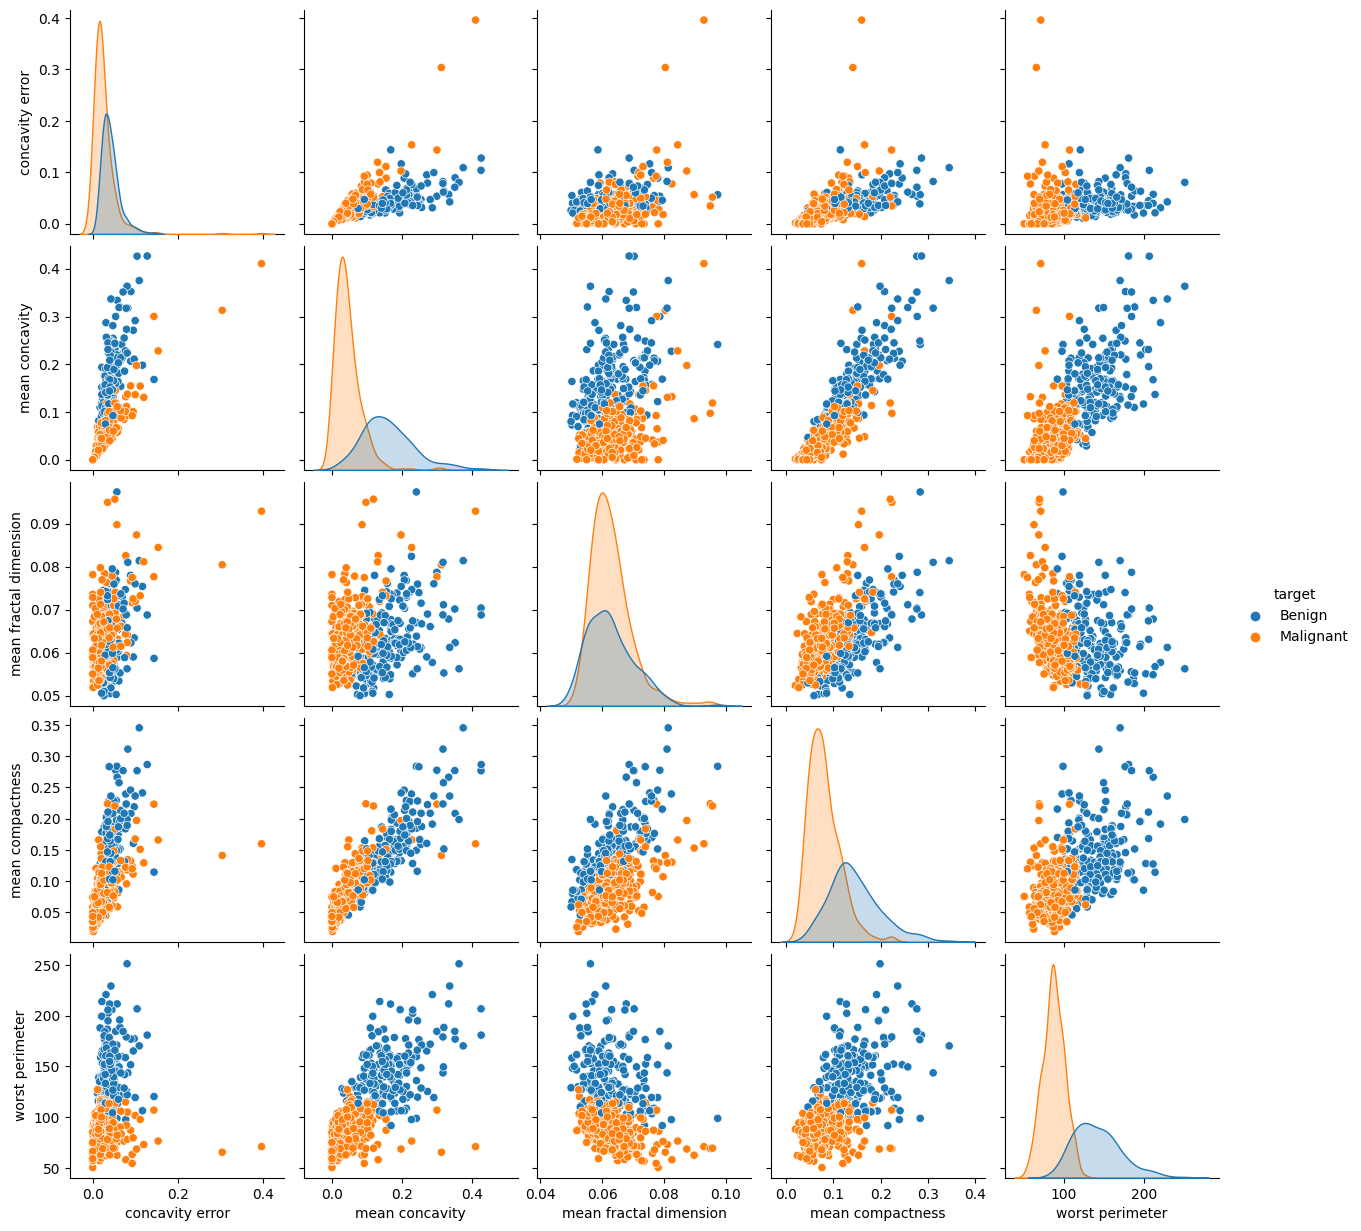

In [83]:
# import functions / libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# setup a copy of the dataset
bc_df = pd.DataFrame(dfbc)

# check for invalid entries
print(f"Any NA?: {bc_df.isna().any().any()}")
print(f"Any NULL?: {bc_df.isnull().any().any()}")

# plot the data
sns.pairplot(bc_df, hue = "target")

Tran / Test Split: 0.3
X Train / X Test: (398, 5) / (171, 5)
Y Train / Y Test: (398,) / (171,)
Accuracy: 88.89%


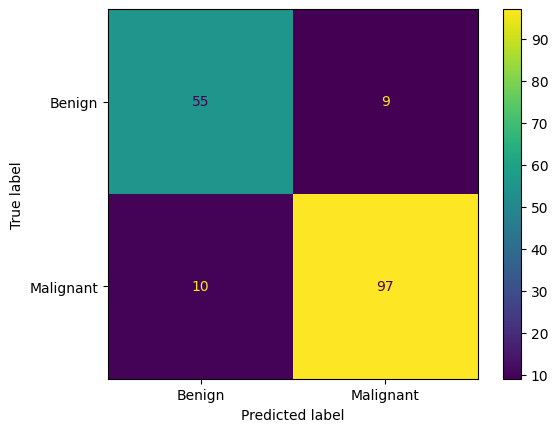

In [139]:
# training columns and target column
bc_df_target   = bc_df["target"]
bc_df_input = bc_df.drop("target", axis = 1) 

# split into train test datasets
split_ratio = 0.3
X_train_bc_df, X_test_bc_df, Y_train_bc_df, Y_test_bc_df = \
    train_test_split(bc_df_input, bc_df_target, stratify = bc_df_target, test_size = split_ratio, random_state = ID) 

print(f"Tran / Test Split: {split_ratio}")
print(f"X Train / X Test: {X_train_bc_df.shape} / {X_test_bc_df.shape}")
print(f"Y Train / Y Test: {Y_train_bc_df.shape} / {Y_test_bc_df.shape}")

# K-Nearest Neighbour classification
knn = KNeighborsClassifier(n_neighbors = kn, metric = "minkowski", p = pn)
knn.fit(X_train_bc_df, Y_train_bc_df)

# Test the accuracy
Y_bc_df_pred = knn.predict(X_test_bc_df)
accuracy = accuracy_score(Y_test_bc_df, Y_bc_df_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# confusion matrix
cm = confusion_matrix(Y_test_bc_df, Y_bc_df_pred)
cmplot = ConfusionMatrixDisplay(cm, display_labels = knn.classes_)
cmplot.plot()
plt.show()

In [140]:
print(f"Test Positive | Prediction Negative {(cm[1][0] / (cm[1][0] + cm[0][0]))*100:.2f}%")

Test Positive | Prediction Negative 15.38%


# TASK 2

This task is a continuation of Task 1 and involves PCA (*Principal Component Analysis*).
You should use the data subset and personalized values from above. Also, after executing
the *untouchable* code below you will get a personalized value of `nc`. This is the number
of principal component you should use. 

In this notebook for Task 2

- Use PCA to analyze the variance in your training data. You may use
`sklearn` for this or work from basic principles.
- How many principal components are there?
- Produce a plot or bar graph of the explained variance percentages for all components.
- Perform PCA to compress your training data using `nc` components. You may use
`sklearn` for this or work from basic principles.
- Produce a plot or bar graph of the explained variance percentages the `nc` component(s).
- Re-run the $k$-NN method using the data compression resulting from choosing
just `nc` principal components.
- Obtain the accuracy score and a confusion matrix as above
- *You must use the same training and test data as above*
- *You must adhere to the principal that the __test data is regarded as unseen__**

In you report for Task 2

- Give a short overview of PCA. Include main concepts and formulae as necessary but
do not give proofs or derivations.
- Explain how much variance is captured by your value of `nc`.
- Discuss the results in terms of accuracies and confusion matrices. Are they comparable?
Do you recommend the use of just `nc` principal components for this model? Feel free to use probabilistic
arguments to elicit the advantages and disadvantages.
- Don't spell *principal* as *principle*. This will be an unconditional fail and you
will be asked to leave the Earth for ever. (Just Kidding!)


**- - DO NOT ALTER THE CONTENTS OF THE NEXT CELL(S) IN ANY WAY - -**

In [86]:
nc = random.randint(1, 4)
print(f'You should use {nc} principal components for you data compression')
print('The variable nc should be used for this')

You should use 4 principal components for you data compression
The variable nc should be used for this


After executing the untouchable cell above you will see how many 
principal components - nc - you should use in your analysis below.

**- - SUBMIT YOUR WORK FOR TASK 2 IN THE CELL(S) BELOW - -**

**- - CREATE MORE CELLS AS NEEDED - -**

Number of Components: 5


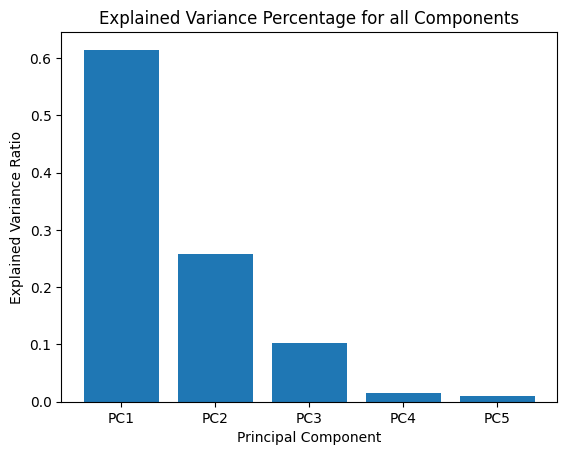

In [120]:
import numpy as np
from sklearn.decomposition import PCA

# parameters
all_nc = 5
normalise = True

# convert numerical values to numpy array
bc_matrix = np.array(bc_df.drop("target", axis = 1))

# normalise the matrix
if normalise:
    bc_matrix = (bc_matrix - np.mean(bc_matrix, axis=0)) / np.std(bc_matrix, axis=0)

# perform the PCA
pca = PCA(n_components = all_nc)
pca.fit(bc_matrix)

# number of principle components
print(f"Number of Components: {all_nc}")

# bar graph of the explained variance percentages
variance_ratios = pca.explained_variance_ratio_
plt.bar(range(len(variance_ratios)), variance_ratios)

plt.xlabel('Principal Component')
x_labels = [f'PC{i + 1}' for i in range(len(variance_ratios))]
plt.xticks(range(len(variance_ratios)), x_labels)

plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Percentage for all Components')
plt.show()

Number of Components: 4
Original Shape: (569, 5)
Transformed Shape: (569, 4)
Variance Explained for 4 Principle Components: 98.97%


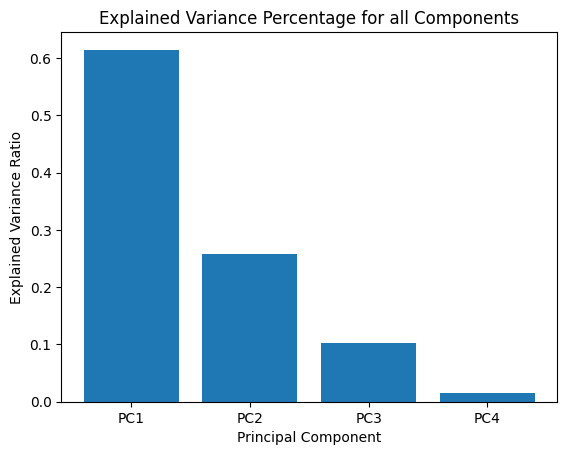

In [125]:
# perform the PCA
pca = PCA(n_components = nc)
pca.fit(bc_matrix)

# number of principle components
print(f"Number of Components: {nc}")

# compressing the data 
bc_matrix_compressed = pca.transform(bc_matrix)
print(f"Original Shape: {bc_matrix.shape}")
print(f"Transformed Shape: {bc_matrix_compressed.shape}")

# bar graph of the explained variance percentages
variance_ratios = pca.explained_variance_ratio_
plt.bar(range(len(variance_ratios)), variance_ratios)

print(f"Variance Explained for {nc} Principle Components: {sum(variance_ratios)*100:.2f}%")

plt.xlabel('Principal Component')
x_labels = [f'PC{i + 1}' for i in range(len(variance_ratios))]
plt.xticks(range(len(variance_ratios)), x_labels)

plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Percentage for all Components')
plt.show()

Tran / Test Split: 0.3
X Train / X Test: (398, 4) / (171, 4)
Y Train / Y Test: (398,) / (171,)
Accuracy: 91.23%


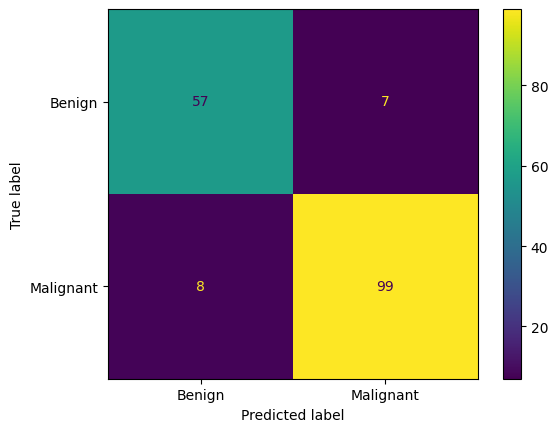

In [136]:
# collect the data 
X_bc_df_compressed = np.array(bc_matrix_compressed)
Y_bc_df_compressed = np.array(bc_df_target)

# split into train test datasets
split_ratio = 0.3
X_train_bc_df_compressed, X_test_bc_df_compressed, \
    Y_train_bc_df_compressed, Y_test_bc_df_compressed = \
    train_test_split(X_bc_df_compressed, Y_bc_df_compressed, stratify = bc_df_target, test_size = split_ratio, random_state = ID) 

print(f"Tran / Test Split: {split_ratio}")
print(f"X Train / X Test: {X_train_bc_df_compressed.shape} / {X_test_bc_df_compressed.shape}")
print(f"Y Train / Y Test: {Y_train_bc_df_compressed.shape} / {Y_test_bc_df_compressed.shape}")

# K-Nearest Neighbour classification
knn = KNeighborsClassifier(n_neighbors = kn, metric = "minkowski", p = pn)
knn.fit(X_train_bc_df_compressed, Y_train_bc_df_compressed)

# Test the accuracy
Y_bc_df_pred_compressed = knn.predict(X_test_bc_df_compressed)
accuracy = accuracy_score(Y_test_bc_df_compressed, Y_bc_df_pred_compressed)
print(f"Accuracy: {accuracy*100:.2f}%")

# confusion matrix
cm = confusion_matrix(Y_test_bc_df_compressed, Y_bc_df_pred_compressed)
cmplot = ConfusionMatrixDisplay(cm, display_labels = knn.classes_)
cmplot.plot()
plt.show()

In [138]:
print(f"Test Positive | Prediction Negative {(cm[1][0] / (cm[1][0] + cm[0][0]))*100:.2f}%")

Test Positive | Prediction Negative 12.31%


# TASK 3

You will compress daily stock data by performing a
*Singular Value Decomposition* (SVD). 
You will use the SVD transformation to add
additional data and illustrate the augmented data set graphically.

The untouchable code below will set up the dataframes for you but you will need to
obtain the CSV files from Brightspace. They are called `TSLAhistory.csv`
and `TSLAupdate.csv`.

Once you have executed the code below you will have access to two dataframes.
**This code should not be altered**.

The data frame in `dfth` will contain historical data for the TESLA share price. 
A set of more recently aquired data is in `dftu`. The real-world situation
we are simulating here is that you have an intial download of data, and you have
performed an SVD on it so that you can select the dominant transformed components
and use those as a **training set** for your machine learning tools. An updated set
of data arrives. These data points are **unseen** as far as your analysis tools are
concerned and so can be designated as a test set. However, your codes have been
trained on SVD-transformed data and so the test set needs also to be transformed
to be comptatible.


In this notebook for Task 3

- Run the untouchable code. Check the data is *clean*. If it isn't then clean it up.
- Use *seaborn* and `sns.pairplot` to create a pair plot for `dfth`. 
- Produce a combined scatter plot of *Volume* vertically against *Open* horizontally with both data sets but distinguished by colour.
- Select training data, `X_train`, from `dfth` using all columns except *Date* and *Adj Close*. 
- Perform an SVD of this training data and determine the rank of the data set.
- Create a (logarithmic) scree plot from the singular values. 
- Create `Xc_train`, an SVD-compressed version of the training data formed by taking just the first `c` dominant singular components.
- Use `linalg.norm(X_train - Xc_train)` from `numpy` to calculate the error in the SVD approximation of `X_train` by `Xc_train`. Plot a graph, or bar chart, of this error against all appropriate values of $c$. 
- Create a compressed training data set using $c=1$ by SVD transformation of `X_train` to a transformed training set, called, for example, `Kc`.
- Create a scatter plot of *open* against *Volume* with `X_train` and `X_test` on the same set of axes, but in different colours. Make sure that your axes are labelled correctly. You can use, for example,

```
# put both of these in the same cell 
plt.scatter(X_train[:,0], X_train[:,4], color='red')
plt.scatter(X_test[:,0],  X_test[:,4],  color='blue')
plt.xlabel('Open'); plt.ylabel('Volume')
```

- Now create similar scatter plot but with `Kc` and `X_test`. How does this plot differ from the last? Explain this difference.
- Transform the test data `X_test` to, say, `Qc`.
- Create yet another similar scatter plot but with `Kc` and `Qc`.
- Repeat the construction of these three scatter plots but with $c=2$. Comment on the results. In particular contrast and compare these plots to the $c=1$ plots.


In you report for Task 3

- Give a short overview of the *Singular Value Decomposition* (SVD).
- Refer to your pairplot - discuss its features. Thinking ahead, how many dominant independent components would you expect to lie in these data?
- Give the rank of the data set.
- Give an outline of the mathematical details of your SVD-transformation of `X_train` to `Kc`.
- Give an outline of the mathematical details and a justification for your method of transformation of `X_test` to `Qc`.
- For $c=1$, how does the second scatter plot differ from the first? Explain this difference. 
- For $c=1$, how does the third scatter plot differ from the first two? Explain this difference. 
- For $c=2$, how do these plots change? How do you interpret this change?


**- - DO NOT ALTER THE CONTENTS OF THE NEXT CELL IN ANY WAY - -**

In [87]:
dfth = pd.read_csv("TSLAhistory.csv")
dftu = pd.read_csv("TSLAupdate.csv")

After executing the untouchable cell above you will see how many 
principal components - nc - you should use in your analysis below.

**- - SUBMIT YOUR WORK FOR TASK 3 IN THE CELL(S) BELOW - -**

**- - CREATE MORE CELLS AS NEEDED - -**

In [141]:
dfth.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-01,230.036667,239.666672,228.350006,239.476669,239.476669,81408600
1,2021-03-02,239.426666,240.369995,228.333328,228.813339,228.813339,71196600
2,2021-03-03,229.330002,233.566666,217.236664,217.733337,217.733337,90624000
3,2021-03-04,218.600006,222.816666,200.000000,207.146667,207.146667,197758500
4,2021-03-05,208.686661,209.279999,179.830002,199.316666,199.316666,268189500


In [142]:
dftu.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-14,191.940002,209.820007,189.440002,209.250000,209.250000,216455700
1,2023-02-15,211.759995,214.660004,206.110001,214.240005,214.240005,182108600
2,2023-02-16,210.779999,217.649994,201.839996,202.039993,202.039993,229586500
3,2023-02-17,199.990005,208.440002,197.500000,208.309998,208.309998,213080200
4,2023-02-21,204.990005,209.710007,197.220001,197.369995,197.369995,180018600


In [147]:
# is data complete? (History)
print(f"(History) Any NA?: {dfth.isna().any().any()}")
print(f"(History) Any NULL?: {dfth.isnull().any().any()}")

(History) Any NA?: False
(History) Any NULL?: False


In [146]:
# is data complete? (Update)
print(f"(Update) Any NA?: {dftu.isna().any().any()}")
print(f"(Update) Any NULL?: {dftu.isnull().any().any()}")

(Update) Any NA?: False
(Update) Any NULL?: False


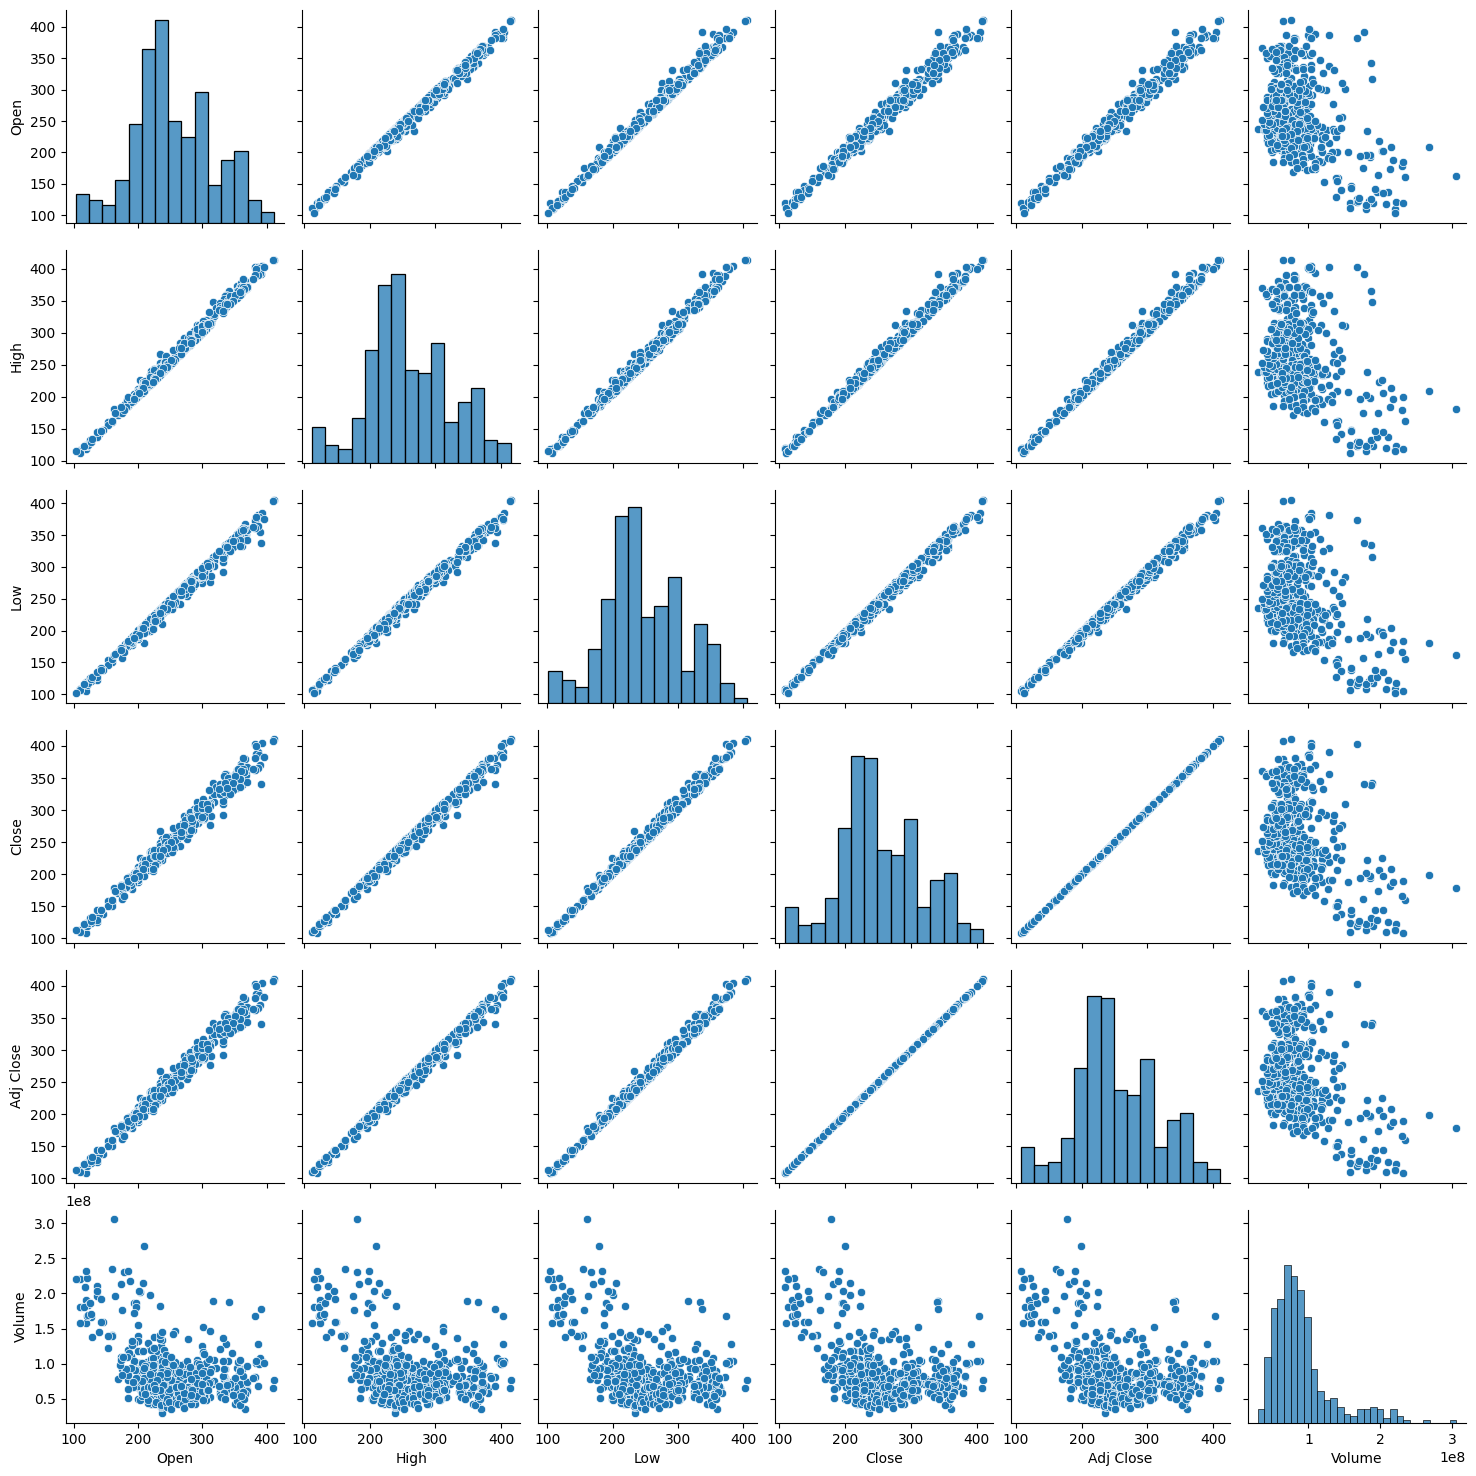

In [148]:
sns.pairplot(dfth)

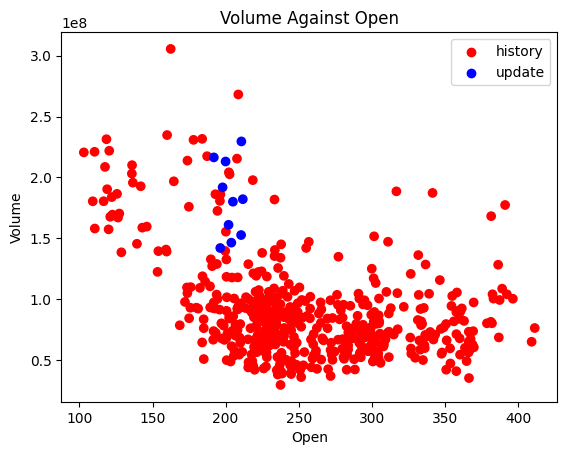

In [162]:
# add source columns
dfth["source"] = "history"
dftu["source"] = "update"

# rbind the datasets
dftc = pd.concat([dfth, dftu])

# add a colour column
source_colours = {"history": "red", "update": "blue"} 
dftc["colour"] = dftc["source"].map(source_colours)

# create a scatter plot
plt.scatter(dftc['Open'], dftc['Volume'], c = dftc['colour'])

# x and y labels
plt.xlabel('Open')
plt.ylabel('Volume')

# add a legend 
for category, color in source_colours.items():
    plt.scatter([], [], c=color, label=category)
plt.legend()

plt.title('Volume Against Open')
plt.show()

In [165]:
# Select a subset of the training data (no Adj Close or Date)
X_train = dfth.drop(["Adj Close", "Date"], axis = 1)
X_train.head()

,Open,High,Low,Close,Volume,source
0,230.036667,239.666672,228.350006,239.476669,81408600,history
1,239.426666,240.369995,228.333328,228.813339,71196600,history
2,229.330002,233.566666,217.236664,217.733337,90624000,history
3,218.600006,222.816666,200.000000,207.146667,197758500,history
4,208.686661,209.279999,179.830002,199.316666,268189500,history


In [88]:
print('End of Notebook')

End of Notebook
